<a href="https://colab.research.google.com/github/SodisettiRakesh123/SkillCraft/blob/main/svm_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import files
uploaded=files.upload()


Saving archive (7).zip to archive (7).zip


In [87]:
import zipfile
extract_path='/content/archive (7).zip'

In [88]:
import zipfile
import os
zip_path='/content/archive (7).zip'
extract_dir='/content/archive'
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_dir)

In [89]:
if not os.path.exists(extract_dir):
  os.makedirs(extract_dir)

In [90]:
try:
  with zipfile.ZipFile(extract_path,'r') as zip_ref:
    zip_ref.extractall(extract_dir)
except Exception as e:
  print(f"An error occurred: {e}")

In [91]:
print("\nContents of the extracted dir:")
!ls -F {extract_dir}


Contents of the extracted dir:
test/  train/


In [92]:
from PIL import Image
from matplotlib import pyplot as plt
import os
import numpy as np


In [93]:
image_folder='/content/archive'

In [94]:
image_files=[f for f in os.listdir(image_folder) if f.lower().endswith(('.png','.jpg', '.jpeg', '.gif', '.bmp'))]

In [106]:
if image_files:
  print(f"\n Found{len(image_files)} image files.")
  sample_image_name=image_files[0]
  sample_image_path=os.path.join(image_folder,sample_image_name)
  sample_image=Image.open(sample_image_path)
  print(f"display :{sample_image_path}")
  try:
    plt.imshow(np.array(sample_image))
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"An error occurred while displaying the image: {e}")
  else:
    print("Image displayed successfully.")

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5439 - loss: 1.0367 - val_accuracy: 0.5000 - val_loss: 0.8080
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.5623 - loss: 0.6806 - val_accuracy: 0.6214 - val_loss: 0.6881
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.6893 - loss: 0.6631 - val_accuracy: 0.5286 - val_loss: 0.7382
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.6622 - loss: 0.6114 - val_accuracy: 0.6143 - val_loss: 0.6740
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.7603 - loss: 0.4941 - val_accuracy: 0.5929 - val_loss: 0.6612
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.8455 - loss: 0.3773 - val_accuracy: 0.6286 - val_loss: 0.7563
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.9229 - loss: 0.2360 - val_accuracy: 0.6714 - val_loss: 0.7671
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.9183 - loss: 0.1860 - val_accuracy: 0.6714 - val_loss:

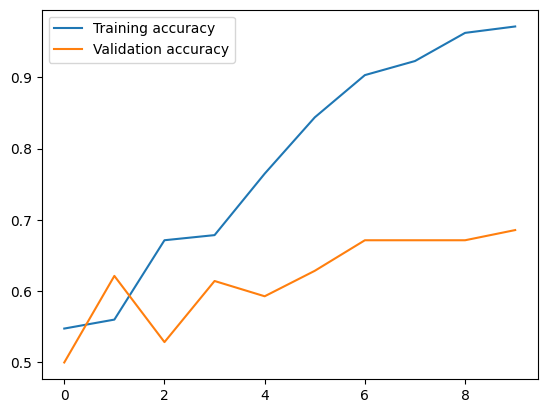

In [108]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
train_dir = '/content/archive/train'
test_dir = '/content/archive/test'

# Define the image dimensions
img_height, img_width = 224, 224

# Define the batch size
batch_size = 32

# Create data generators for training and testing
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the dataset
train_dir = '/content/archive/train'  # Replace with your actual train directory path
test_dir = '/content/archive/test'    # Replace with your actual test directory path

# Define the image dimensions
img_height, img_width = 224, 224

# --- Feature Extraction using a Pre-trained CNN (VGG16) ---
# Load a pre-trained VGG16 model without the top classification layers
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Define a function to extract features
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512)) # VGG16 output shape before flattening
    labels = np.zeros(shape=(sample_count))
    generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=20, # Use a smaller batch size for feature extraction
        class_mode='binary',
        shuffle=False # Keep data in order to match labels
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * 20 : (i + 1) * 20] = features_batch
        labels[i * 20 : (i + 1) * 20] = labels_batch
        i += 1
        if i * 20 >= sample_count:
            break # Stop once we've processed all samples
    return features, labels, generator.class_indices

# Determine the number of samples in train and test directories
# You'll need to count the images in your actual directories
# This is a placeholder, replace with actual counts or use a generator to count
print("Counting images in directories...")
train_datagen_count = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)
test_datagen_count = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)
train_sample_count = train_datagen_count.samples
test_sample_count = test_datagen_count.samples
print(f"Found {train_sample_count} training images.")
print(f"Found {test_sample_count} testing images.")

print("Extracting training features...")
train_features, train_labels, class_indices = extract_features(train_dir, train_sample_count)
print("Extracting testing features...")
test_features, test_labels, _ = extract_features(test_dir, test_sample_count)

# Flatten the extracted features
train_features = np.reshape(train_features, (train_sample_count, 7 * 7 * 512))
test_features = np.reshape(test_features, (test_sample_count, 7 * 7 * 512))

# --- Train the SVM model ---
print("Training SVM model...")
svm_model = SVC(kernel='linear', random_state=42) # You can experiment with different kernels
svm_model.fit(train_features, train_labels)
print("SVM model training complete.")

# --- Evaluate the SVM model ---
print("Evaluating SVM model...")
test_pred_labels = svm_model.predict(test_features)
test_acc = accuracy_score(test_labels, test_pred_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Note: Plotting training/validation accuracy like with the CNN is not directly applicable to SVMs
# You would typically use cross-validation during training for performance estimation.

Counting images in directories...
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 557 training images.
Found 140 testing images.
Extracting training features...
Found 557 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/ste